# Geospatial Data Tutorial
*Chris Couto, Nestor Coria, Sean Wu*

Audience: `Learners` / `Data Enthusiasts` / `Journalists`

Use case: `How-To`

Difficulty: `Beginner` Assumes users have taken an introductory course in computer science and that they know of some of the basic operations for Python.

Completion time: `45 minutes`

Knowledge Required:
* Python basics (variables, functions, lists, datatypes, dictionaries, lambda functions)
* How Python libraries work (installation and imports)
* Modifying, slicing Python strings

Learning Objectives: After this lesson, learners will be able to:

1. Load a csv file into Python using **pandas** for cleaning and querying data
2. Convert **pandas** dataframe into **geopandas** data structures for the purpose of making plots 
3. Develop a workflow in order to build maps from geospatial data
4. Be familiar with **geopandas**, **shapely**, and basic cartography concepts for map customization

## Required Python Libraries
* [pandas](https://pandas.pydata.org/) for manipulating and cleaning geospatial data
* [geopandas](https://geopandas.org/en/stable/docs/reference/geodataframe.html)  to easily process and plot geospatial data
* [seaborn](https://seaborn.pydata.org/) for easy statistics plotting on non-geospatial data
* [matplotlib](https://matplotlib.org/) for tuning individual plot mechanics
* [geoplot](https://residentmario.github.io/geoplot/index.html) another library to plot geospatial data, but here we just use it for its USA dataset


# Introduction and Motivation
In today's world, data is very important! When experts need to make decisions, they look to relevant data sources as well as the people who can analyze and present it effectively. Within this sphere, geospatial data (data that maps onto the real world) stands out for its many applications, from global business to disease modeling and politics. 

In this tutorial, you will learn how to work with and visualize geospatial data from the ground up using Python. Starting from UFO sightings data sourced online, you will learn how to process these files effectively using **pandas** and **geopandas** and visualize them using **geoplot**. Finally, you will learn some more advanced concepts that will expand your skillset further, including map projections and adding additional plot details using **shapely**.



## Setup

Step 1 : Go on this [Google Drive Folder](https://drive.google.com/drive/folders/1NyprkJ-jH5x2_uPGaGTOZE_S_35-Gf0M?usp=sharing) and download `nuforc_report.csv`, `uscities.csv`, and `worldcities.csv`.

Step 2: Go to the sidebar on this page and click on the folder icon (the fourth icon from the top). Once you've clicked this the sidebar should expand. Upload the csv files to the session storage by clicking on the icon with a document and an up arrow, right underneath the text that says "Files" (if you hover over this icon it should say "Upload to session storage").

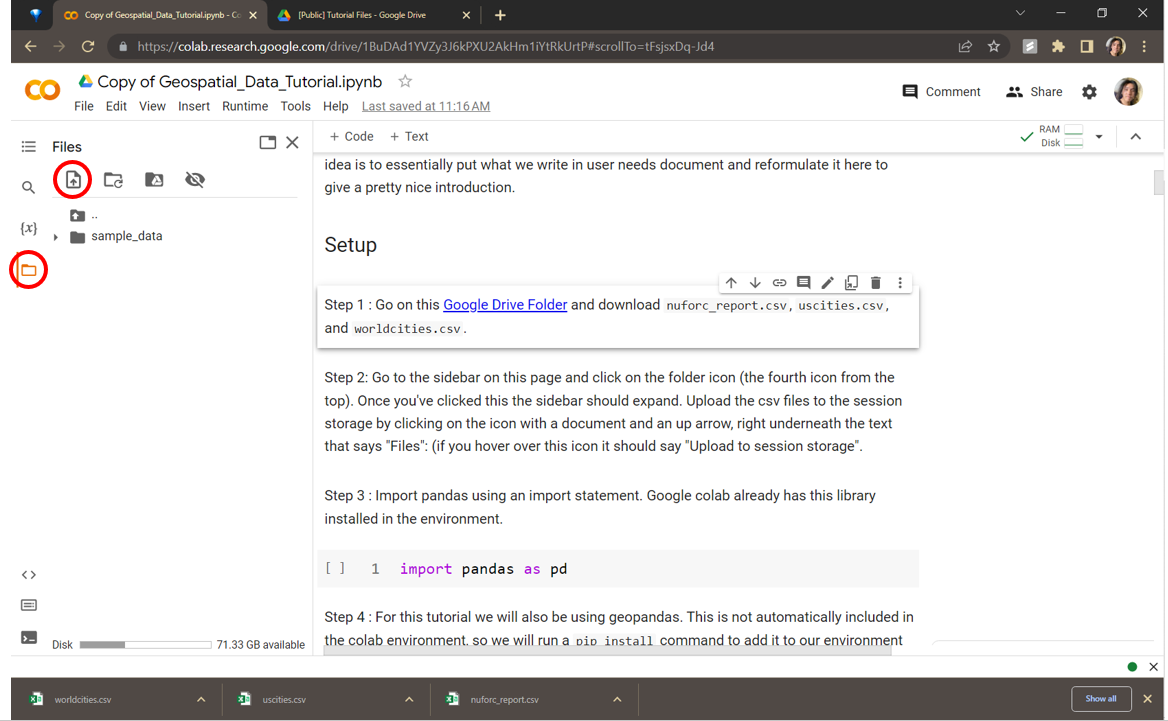

Step 3 : Import **pandas** using an import statement. Google colab already has this library installed in the environment.

In [ ]:
import pandas as pd

Step 4 : For this tutorial we will also be using **geopandas**. This is not automatically included in the colab environment, so we will run a `pip install` command to add it (this process may take a while).

In [ ]:
!pip install geopandas geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 44.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102745 sha256=9fe4a1abb6baa10f6c37e026abe71a315b142cb546311e80184074a87703295b
  Stored in directory: /root/.cache/pi

## Processing Data

In this tutorial we will be using data from the National UFO Reporting Center (NUFORC). **Please use the csv you downloaded during the setup!** If you are curious about where this data came from, it originated from this [data.world](https://data.world/ck30/ufo-data-nuforc) link. Geospatial information already existed in that dataset, but we've removed it so we can go through adding it together.

In order to play around with the data in Python, we will be using **pandas** to create a dataframe object using information from the csv you uploaded to this session. A csv file is a text file where each item is separated by a comma and each row of items is separated by a line (csv stands for comma separated value).

In [ ]:
nuforc_data = pd.read_csv('nuforc_report.csv', header=0)

A **pandas** dataframe object is essentially a table with rows and columns. We can have a look at the first couple of rows of the dataframe we created by using the `.head( n )` command where n is the number of rows we want to see of the data frame.

In [ ]:
nuforc_data.head(10)

,summary,country,city,state,date_time,shape,duration
0,Long and narrow illuminated craft flying high ...,USA,Sisters,OR,2021-05-15T22:36:00,cigar,4 minutes
1,String of lights,USA,Sarasota,FL,2021-05-10T22:00:00,other,2 minutes
2,30+ lights in a line.,USA,Cleveland,TN,2021-05-05T22:35:00,light,10 minutes
3,I was standing at my kitchen sink and looked u...,USA,Galway,NY,2020-10-16T18:25:00,circle,5 mins
4,Multiple slow moving craft seen all over the s...,USA,Downingtown,PA,2021-06-18T01:00:00,circle,1 hour
5,1:20 am Huge Orange Circular Craft over the SE...,USA,Oakland,CA,2021-06-18T01:20:00,circle,7 min
6,Bright stationary white lights in the sky tha...,USA,Seattle,WA,2021-06-18T03:30:00,light,15 seconds
7,Approximately 20:49 a bright green square with...,USA,Quarry,IA,2021-08-12T20:49:00,other,10 seconds
8,I have 3 dogs and I walk them 1 at a time.At 1...,USA,Jacksonville,FL,2021-08-12T21:30:00,light,15 minutes
9,"Red dots in triangle form, stationary, then mo...",USA,Dover,NH,2021-07-27T00:00:00,triangle,40 min


We can see that our dataframe has a column that is dedicated to reporting which country the UFO sighting was reported from. For this section of the tutorial, we want to focus on UFO sightings from the US.

In order to figure out how to filter out the rows which don't have 'USA' in their country column, let's first look at how we can select single or multiple rows from the dataframe.

One way to think about dataframes is as a dictionary of lists. By writing out the variable for the dataframe and adding `[ n ]` where `n` is the row we want to look at, we can select only the nth row to look at (indexing starts at 0).

In [ ]:
nuforc_data['summary'][2]

'30+ lights in a line.'

We can also look at multiple rows by writing  `n:m` in the brackets. In this case, we are showing the rows from `n` up to `m`. 


In [ ]:
nuforc_data['summary'][2:5]

2                                30+ lights in a line.
3    I was standing at my kitchen sink and looked u...
4    Multiple slow moving craft seen all over the s...
Name: summary, dtype: object

Now that we have seen how we can select certain rows from the dataframe, we can similarly put conditions within the brackets to filter out rows which don't satisfy the conditions of the filter.

In [ ]:
# Filter it down to just the US data
nuforc_data = nuforc_data[nuforc_data['country'] == 'USA']

In the code block above, we make sure that the data in the `'country'` column of `nuforc_data` is equivalent to `'USA'` within the filter, giving us our desired result.

In [ ]:
nuforc_data.head(3)

,summary,country,city,state,date_time,shape,duration
0,Long and narrow illuminated craft flying high ...,USA,Sisters,OR,2021-05-15T22:36:00,cigar,4 minutes
1,String of lights,USA,Sarasota,FL,2021-05-10T22:00:00,other,2 minutes
2,30+ lights in a line.,USA,Cleveland,TN,2021-05-05T22:35:00,light,10 minutes


Knowing the country, city, and state of each sighting is helpful, but to make it geospatial we need to associate this information with an exact latitude and longitude. To do this, we're going to merge our `nuforc_data` with another dataset that maps locations to latitudes and longitudes. This dataset was obtained as a free download from [simplemaps.com](https://simplemaps.com/data/us-cities) (you already downloaded this dataset from our folder, no need to follow this link and download it again).

Like with the `nuforc_data`, the first step in this process is loading the csv into a **pandas** dataframe:

In [ ]:
# Load in the city and population data
city_data = pd.read_csv('uscities.csv', header=0)

Let's take a look at what is in this data:

In [ ]:
city_data.head(3)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494


There's a lot of information here, but we care most about columns that define a city's location (such as `city`, `state_id`, `lat`, and `lng`). You also might notice that the first two columns seem to accomplish the same thing - `city` and `city_ascii`. The difference there is in how the strings are encoded: `city` uses the Unicode standard while `city_ascii` uses the ASCII format. This difference doesn't matter for us today but in other contexts it's very important, so read more about it [here](https://kb.iu.edu/d/ahfr) if you're curious.

For merging the data, **pandas** has a helpful function called merge. Both data sources have columns specifying city and state name, so to match these up we're looking to pair rows between the two sources based on those two things. If there's a sighting in `nuforc_data` without a corresponding city in `city_data`, we can't do any interesting geospatial work with it, so we'll drop it. The technical term for this operation is an inner join. There are [multiple ways to join/merge data](https://www.ibm.com/docs/en/spss-modeler/saas?topic=node-types-joins) if you are curious to learn more! 

In [ ]:
# Perform an inner join on the city and state code info
merged_data = pd.merge(nuforc_data, city_data, left_on=['city', 'state'], right_on=['city','state_id'])

Now to see what that looks like:

In [ ]:
merged_data.head(3)

,summary,country,city,state,date_time,shape,duration,city_ascii,state_id,state_name,...,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,Long and narrow illuminated craft flying high ...,USA,Sisters,OR,2021-05-15T22:36:00,cigar,4 minutes,Sisters,OR,Oregon,...,-121.5531,2945,541.2,shape,False,True,America/Los_Angeles,3,97759,1840021262
1,CLOSE INCOUNTER Alien Abduction with full acti...,USA,Sisters,OR,1993-01-31T23:07:00,disk,2 hours 3D,Sisters,OR,Oregon,...,-121.5531,2945,541.2,shape,False,True,America/Los_Angeles,3,97759,1840021262
2,2 identical objects seen at high altitude.,USA,Sisters,OR,2001-08-17T22:00:00,light,2 minutes,Sisters,OR,Oregon,...,-121.5531,2945,541.2,shape,False,True,America/Los_Angeles,3,97759,1840021262


When you lose data (like when you're doing an inner join), it's important to consider how much you're losing and for what reason. We can find how much data we've lost by computing an outer join, which returns all the rows that have matching city and state fields plus the ones that didn't match from both data sources. Using an `indicator=True` option we can discern which rows in the UFO sightings data didn't match (left_only) and which ones in the cities data didn't match (right_only).

In [ ]:
# perform an outer join with indicator option enabled
outer_data = pd.merge(nuforc_data, city_data, how="outer", indicator=True, left_on=['city', 'state'], right_on=['city','state_id'])

# pull out the nonmatching rows in both data sets
unmatched_sightings = outer_data[outer_data['_merge'] == 'left_only']
unmatched_cities = outer_data[outer_data['_merge'] == 'right_only']

# print their lengths
print("Number of unmatched cities: " + str(len(unmatched_cities)))
print("Number of unmatched UFO sightings: " + str(len(unmatched_sightings)))

Number of unmatched cities: 23186
Number of unmatched UFO sightings: 7005


Now we'll pull some city and state names so you can see why some of the rows didn't match. 

In [ ]:
print("From cities data: " + str(unmatched_cities.iloc[2,2]) + ", " + str(unmatched_cities.iloc[2,8]))
print("From sightings data: " + str(unmatched_sightings.iloc[98,2]) + ", " + str(unmatched_sightings.iloc[98,3]))

From cities data: Bronx, NY
From sightings data: St Louis, MO


In this case, it's important to remember that data joins are not very smart! These rows didn't match because Saint is abbreviated in one name field but not another.

In [ ]:
print("From sightings data: " + str(unmatched_sightings.iloc[1000,2]) + ", " + str(unmatched_sightings.iloc[1000,3]))

From sightings data: Otis, OR


Another common source of data mismatches is imprecise data. This sighting took place in Alabama, but where exactly they're not sure. It's probably a good thing that this sighting didn't match to any cities...

In [ ]:
print("From sightings data: " + str(unmatched_sightings.iloc[3000,2]) + ", " + str(unmatched_sightings.iloc[3000,3]))

city_data[city_data['city'] == unmatched_sightings.iloc[3000,2]] 

From sightings data: Davis Jct., IL


,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id


Finally, it should be noted that the cities dataset used here does not include every single town in the United States. There will be cases where a valid sighting does not get matched because the city just isn't present in the data, such as Alto, New Mexico.

There can be many more reasons why data does not match in a join, but these are some of the major reasons why!

Jumping back to `merged_data`, this merged dataset has a lot of excess information that we don't want. Fortunately, **pandas** makes it easy to select a subset of this data that will be easier to work with. We can do that by simply specifying the desired columns in a list:

In [ ]:
# Pare down the data to something more focused
processed_data = merged_data[['city', 'state', 'population', 'lat', 'lng']].copy()

processed_data.head(3)

,city,state,population,lat,lng
0,Sisters,OR,2945,44.2923,-121.5531
1,Sisters,OR,2945,44.2923,-121.5531
2,Sisters,OR,2945,44.2923,-121.5531


**as a note, we use the `.copy()` function because technically otherwise, although we made a new variable `processed_data` , we'd really still be messing with `merged_data` otherwise. learn more about this [here!](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)*

That looks a lot better. As a final step, we're going to transform our data such that instead of listing each sighting in a row, it combines them and stores the number of sightings in each city scaled by its population.

We'll start by creating a column that counts the number of sightings in each city. This will involve two **pandas** functions - groupby and transform. Groupby is helpful because we want to cluster our data based around each unique location. As with our merge from earlier, we'll use the city and state columns to do this. Once we've clustered our sightings, the transform function is useful for applying a function to each group. In this case, we use the 'count' function that will sum up the number of sightings in each cluster.

In [ ]:
# Obtain the number of sightings in each city, add as a column to the dataframe
processed_data['count'] = processed_data.groupby(['city'])['state'].transform('count')

As you can see above, we now have a bunch of duplicate rows. In pandas, you can remove those easily using the drop_duplicates function: 

In [ ]:
# Drop duplicate rows now that we've got the counts
processed_data = processed_data.drop_duplicates(subset=['city', 'state'])

Finally, we're going to make a new column called `scaled_counts` that takes each entry in the count column and divides it by the appropriate population:

In [ ]:
# Scale our sightings by the population of each city
processed_data['scaled_counts'] = processed_data['count']/processed_data['population']

We're almost done! There's one more quirk of our data that needs to be sorted out. If you look closely at the population data, you can find some cities that have a population of zero. This leads to infinite values in the `scaled_counts` column.

In [ ]:
processed_data[processed_data['population'] == 0].head(5)

,city,state,population,lat,lng,count,scaled_counts
5220,Concho,AZ,0,34.4742,-109.6102,2,inf
8365,Jenner,CA,0,38.4510,-123.1203,2,inf
11496,Creston,CA,0,35.5173,-120.5210,1,inf
16681,Rachel,NV,0,37.6414,-115.7681,13,inf
18448,Pearsonville,CA,0,35.8189,-117.8755,1,inf


We have no interest in plotting infinite values! So let's remove all rows with these infinite results by toggling an option in pandas to recognize inf's as not-a-number (nan) values. Once that's done, it's as simple as telling pandas to drop any rows containing any nans:

In [ ]:
# Remove rows containing infinities from divide by 0
pd.options.mode.use_inf_as_na = True
processed_data.dropna(inplace=True)

processed_data.sort_values(by=['scaled_counts'], ascending=False, inplace=True)

We are now ready to make the jump from **pandas** to **geopandas**. This involves converting our dataframe to a special geodataframe for geospatial data. We'll provide the dataframe along with our latitude and longitude columns in order to form a new `geometry` column.

In [ ]:
# Import the geopandas library
import geopandas as gpd

# Convert to a GeoPandas data frame!
gdf = gpd.GeoDataFrame(processed_data, geometry=gpd.points_from_xy(processed_data['lng'], processed_data['lat']))

gdf.head()

,city,state,population,lat,lng,count,scaled_counts,geometry
21066,Austin,NV,18,39.4976,-117.0740,119,6.611111,POINT (-117.07400 39.49760)
28596,San Antonio,NM,16,33.9161,-106.8700,93,5.812500,POINT (-106.87000 33.91610)
16995,Kenton,OK,4,36.9064,-102.9653,5,1.250000,POINT (-102.96530 36.90640)
17772,Beaumont,KS,12,37.6565,-96.5316,12,1.000000,POINT (-96.53160 37.65650)
25664,Lake Buena Vista,FL,7,28.3790,-81.5262,5,0.714286,POINT (-81.52620 28.37900)


Take a look at that `geometry` column on the right side. The POINTs are a standardized format spatial type following the [Shapefile format](https://en.wikipedia.org/wiki/Shapefile). Other shape types include polylines and polygons.

## Plotting Data
Now we're ready to start visualizing this data! Let's first import the libraries we installed. While there are many Python libraries that can be used for plotting, we will be using **geopandas**'s built in plotting feature to do most of our plotting.



In [ ]:
from geoplot import datasets as gpt_datasets
from geopandas import datasets as gpd_datasets
import seaborn as sns
from matplotlib import pyplot as plt

In the imports above, **seaborn** will be used for plotting statistical data, and **matplotlib** will be useful for decorating plot features like axes and labels.

We imported `datasets` that include useful Shapefile datasets so we don't have to download the shape of countries and US states separately. For example:


In [ ]:
# Loads US states into a GeoDataFrame
contiguous_usa_gdf = gpd.read_file(gpt_datasets.get_path('contiguous_usa'))

Let's see how it looks by using the convenient plot function!

<Axes: >

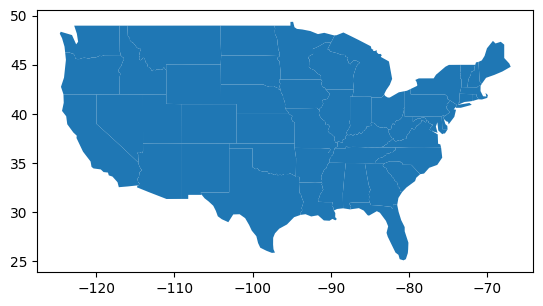

In [ ]:
contiguous_usa_gdf.plot()

Woohoo! We see the familiar 48 states without Alaska and Hawaii. However, the state borders are quite hard to see. And what if we wanted to change the colors?

We can read the [**geopandas** documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) to find what available keywords there are. Let's choose some colors first:

<Axes: >

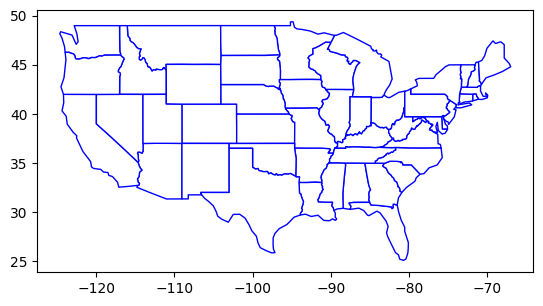

In [ ]:
contiguous_usa_gdf.plot(facecolor="white", edgecolor="blue")

Keyword arguments are ***key*** for customizing how you want your plot to look. But remember, no plot is good without axis labels. Let's add some now:

Text(47.222222222222214, 0.5, 'Latitude')

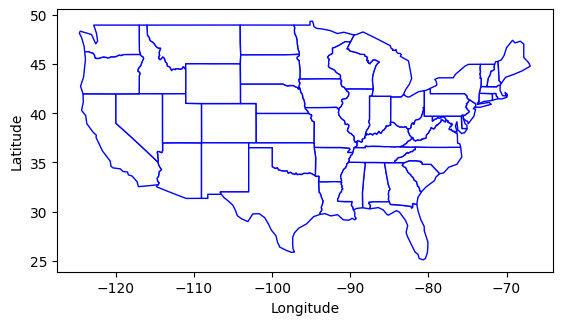

In [ ]:
contiguous_usa_gdf.plot(facecolor="white", edgecolor="blue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Now that's a proper map. But how do you incorporate your own data? Well, if we set the US state shapes as our basemap, we can also overlay our UFO sightings data on top as well!

Text(47.097222222222214, 0.5, 'Latitude')

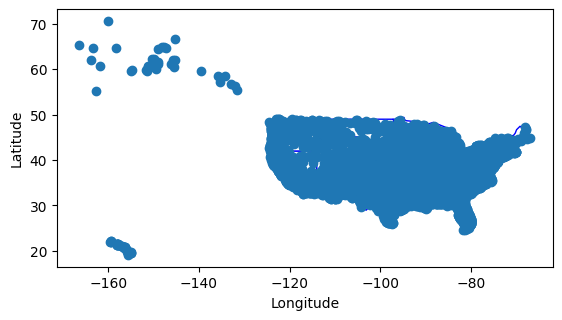

In [ ]:
# First get an axis to attach plots to
fig, ax = plt.subplots()

# Then attach each plot to the same axis!
contiguous_usa_gdf.plot(ax=ax, facecolor="white", edgecolor="blue")
gdf.plot(ax=ax)

# Don't forget labels!
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Oh no! All of our data points are covering up the shape data underneath (you can just see Maine peeking out the corner). How do we customize the way our plot looks? Keyword arguments! Let's try again:

Text(47.097222222222214, 0.5, 'Latitude')

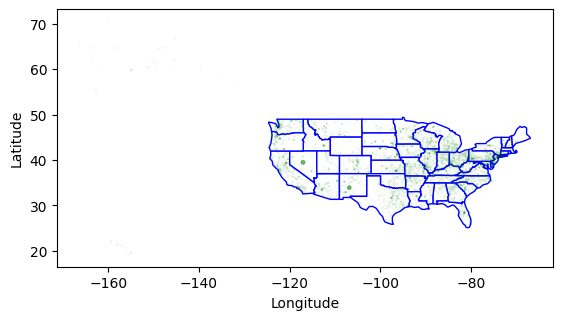

In [ ]:
# get a new axis to attach to
fig, ax = plt.subplots()
contiguous_usa_gdf.plot(ax=ax, facecolor="white", edgecolor="blue")

# Check out the new keyword arguments!
gdf.plot(ax=ax, color="green", alpha=0.5, markersize="scaled_counts")

# Don't forget labels!
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Much better! In the code above, we changed the transparency (`alpha`) of each marker dot from its default of `1.0` to `0.5`, made the markers green to contrast the blue borders, and adjusted the size of the marker according to the reports per population metric in the geodataframe column `'scaled counts'`.

If we have better visual feedback from our data, we can use it to ask new questions we haven't had before. For instance, there are a lot of cities in the green scatter plot above. How should we filter out the most significant cities? Let's take a histogram of the plot using **seaborn**:

<Axes: xlabel='scaled_counts', ylabel='Count'>

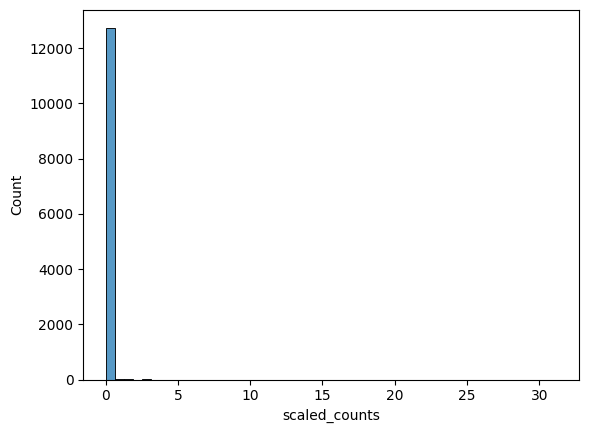

In [ ]:
# Look at scaled_counts
sns.histplot(data=gdf, x='scaled_counts', bins=50)

Oh that's barely readable. You can see a huge bar next to a few tiny bars to its right. Let's zoom in with **matplotlib**:

(0.0, 8.0)

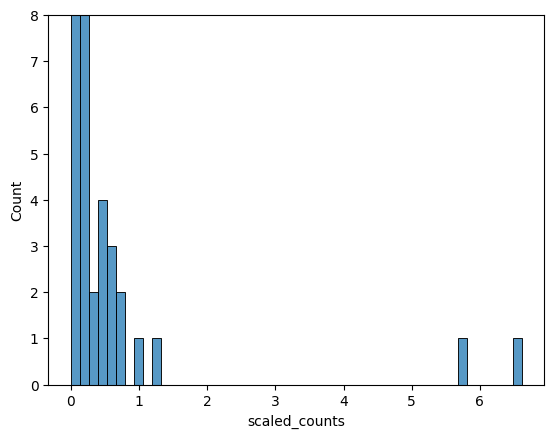

In [ ]:
sns.histplot(data=gdf, x='scaled_counts', bins=50)

# Constrain the y axis from 0 to 8 so that it's more readable
plt.ylim((0, 8))

Looks like most cities have a scaled count of 0.2 or less. Let's plot everything else using the query function for geodataframes, and plot again!

Text(47.222222222222214, 0.5, 'Latitude')

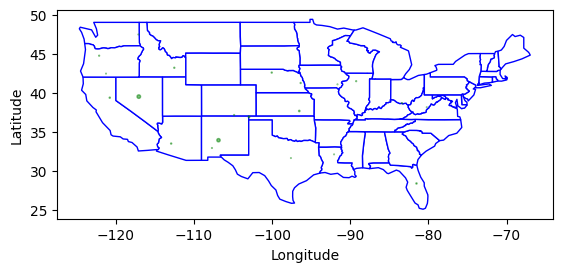

In [ ]:
# Set a hard cutoff for relevant scaled_counts
gdf_cutoff = gdf.query("scaled_counts > 0.2")

# Same commands as before, but with gdf_cutoff.plot instead
fig, ax = plt.subplots()
contiguous_usa_gdf.plot(ax=ax, facecolor="white", edgecolor="blue")
gdf_cutoff.plot(ax=ax, color="green", alpha=0.5, markersize="scaled_counts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Global Point of View

There is one visual change to the map that **matplotlib** is not designed to perform: reprojecting the longitude and latitude data onto a different coordinate reference system.

But first, what's a map projection? It's a way of transferring math coordinates onto the shape of the earth. This makes a difference on maps. You may have seen some maps showing Greenland and Antarctica as huge shapes, while on other maps Greenland and Antarctica are shrunk near the top and bottom.

This [Wikipedia page](https://en.wikipedia.org/wiki/List_of_map_projections) has a great gallery of various map projections.

These map projections are formalized mathematically in coordinate reference systems (CRS), which are standardized map projections. For more information about their history, this other [Wikipedia page](https://en.wikipedia.org/wiki/List_of_national_coordinate_reference_systems) is helpful!. Each geodataframe can also define a CRS:

In [ ]:
# Coordinate reference systems
print(contiguous_usa_gdf.crs)
print(gdf.crs)

EPSG:4326
None


EPSG's are standard codes for each coordinate reference system (which you can look up [here](https://epsg.io/)). EPSG 4326 follows the World Geodetic System 1984 or WGS 84 used in GPS systems. Notice how our geodataframe of the UFO data has no CRS! We can assign it one so that it matches it.

In [ ]:
gdf.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


To work with map projections in more detail, we're going to need data that includes UFO sightings from outside of the US. To do this, we'll import the same `nuforc_report.csv` from earlier, but to make it geospatial we're going to use `world_cities.csv` instead. Coming from [the same source](https://simplemaps.com/data/world-cities) as our US cities dataset from earlier, this file contains the names, positions, and more for notable cities and towns throughout the world. Please don't download the csv again from the source, you have it downloaded already. From there, we'll merge the two sources on the city name and 3-letter country code.

In [ ]:
nuforc_world_data = pd.read_csv('nuforc_report.csv', header=0, usecols = [0,1,2,3,4,5,6])

world_cities_data = pd.read_csv('worldcities.csv', header=0)

merged_world_data = pd.merge(nuforc_world_data, world_cities_data, left_on=['city'], right_on=['city_ascii'])

Then, we'll apply the same data processing as before:

In [ ]:
# Obtain the number of sightings in each lat/lng, add as a column to the dataframe
processed_world_data = merged_world_data.groupby(['country_x', 'city_ascii', 'lat', 'lng', 'population']).size().reset_index(name='count')
processed_world_data['scaled_counts'] = processed_world_data['count'] / processed_world_data['population']
processed_world_data['scaled_counts'] = processed_world_data['scaled_counts'] / processed_world_data['scaled_counts'].max()
processed_world_data.dropna(inplace=True)
processed_world_data.sort_values(by=['scaled_counts'], ascending=False, inplace = True)
processed_world_data

,country_x,city_ascii,lat,lng,population,count,scaled_counts
8951,USA,Zillah,28.5504,17.5834,10.0,4,1.000000e+00
6887,USA,Richmond,-20.7305,143.1425,648.0,230,8.873457e-01
3792,USA,Georgetown,-18.3000,143.5500,348.0,79,5.675287e-01
6693,USA,Portland,42.8696,-84.8990,5104.0,648,3.173981e-01
6691,USA,Portland,40.4375,-84.9833,6002.0,648,2.699100e-01
...,...,...,...,...,...,...,...
1337,South Korea,Seoul,37.5600,126.9900,22394000.0,1,1.116370e-07
1252,Philippines,Manila,14.6000,120.9833,23971000.0,1,1.042927e-07
331,Canada,Delhi,28.6667,77.2167,31870000.0,1,7.844368e-08
1136,India,Delhi,28.6667,77.2167,31870000.0,1,7.844368e-08


Now that everything is merged, we'll use geopandas and the latitude and longitude columns to make our data geospatial.

In [ ]:
world_data_gdf = gpd.GeoDataFrame(processed_world_data, geometry=gpd.points_from_xy(processed_world_data['lng'], processed_world_data['lat']))

world_data_gdf.head()

,country_x,city_ascii,lat,lng,population,count,scaled_counts,geometry
8951,USA,Zillah,28.5504,17.5834,10.0,4,1.000000,POINT (17.58340 28.55040)
6887,USA,Richmond,-20.7305,143.1425,648.0,230,0.887346,POINT (143.14250 -20.73050)
3792,USA,Georgetown,-18.3000,143.5500,348.0,79,0.567529,POINT (143.55000 -18.30000)
6693,USA,Portland,42.8696,-84.8990,5104.0,648,0.317398,POINT (-84.89900 42.86960)
6691,USA,Portland,40.4375,-84.9833,6002.0,648,0.269910,POINT (-84.98330 40.43750)


Now what's all this trouble with the map projection's CRS? Well, it actually makes a difference on our plots! Let's try it. Cartopy, which comes with geopandas, is a python library that hosts many CRS. Let's import `crs` from this library to get more options.

In [ ]:
from cartopy import crs as ccrs

Next, let's get a visual of the world and plot it as is.

<Axes: >

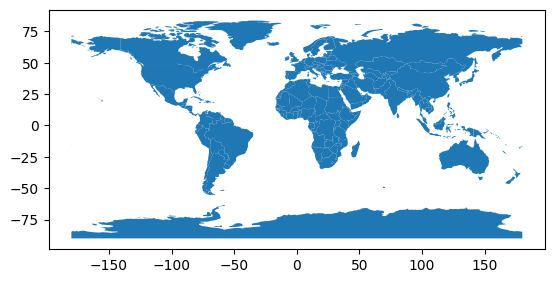

In [ ]:
earth_gdf = gpd.read_file(gpd_datasets.get_path('naturalearth_lowres'))
earth_gdf.plot()

Now, let's set this to a new CRS that will give us a globe-like projection:

In [ ]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init

As before, let's set the CRS of our geodataframes to this new CRS:

In [ ]:
earth_ae = earth_gdf.to_crs(crs_proj4)
world_data_gdf.set_crs(epsg=4326, inplace=True)
gdf_ae = world_data_gdf.to_crs(crs_proj4)
gdf_ae.head()

,country_x,city_ascii,lat,lng,population,count,scaled_counts,geometry
8951,USA,Zillah,28.5504,17.5834,10.0,4,1.000000,POINT (1791578.202 3206402.659)
6887,USA,Richmond,-20.7305,143.1425,648.0,230,0.887346,POINT (13009756.689 -8257041.152)
3792,USA,Georgetown,-18.3000,143.5500,348.0,79,0.567529,POINT (13574022.669 -7604518.808)
6693,USA,Portland,42.8696,-84.8990,5104.0,648,0.317398,POINT (-7030852.937 6528391.341)
6691,USA,Portland,40.4375,-84.9833,6002.0,648,0.269910,POINT (-7295782.293 6218366.276)


Finally, let's use the same plotting technique we did before to combine this data!

Text(107.52503327879332, 0.5, 'Y [m]')

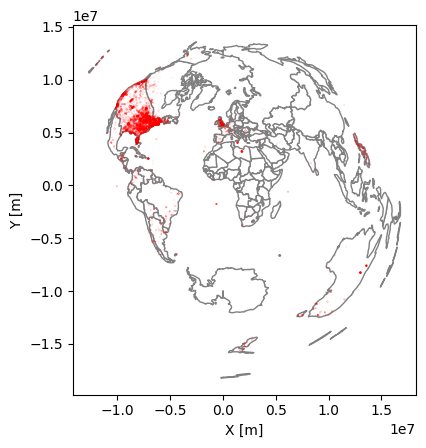

In [ ]:
fig, ax = plt.subplots()
earth_ae.plot(ax=ax, facecolor="white", edgecolor="grey")
gdf_ae.plot(ax=ax, color="red", alpha=1, markersize='scaled_counts')

# In this projection, the units are meters and not lat/long degrees
plt.xlabel("X [m]")
plt.ylabel("Y [m]")

As referenced in the Wikipedia links above, there are [many more fun and interesting coordinate reference frames in Cartopy](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#) to choose from. The world is your canvas. Give them a try! 

# Adding more to your plots with Shapely

To finish off this tutorial, we're going to be using a package called `shapely` to create our own shapes and drawings that can be added to your maps as you please.

But to start with that, we're first going to get a different slice of our dataset to play with. Recall that in the original UFO data, each sighting has the shape of the UFO described (a disk, a point of light, and so on).   Out of the merged US data we're going to pull information that will allow us to consider this information on the state level. 

In [ ]:
shape_data = merged_data[['city', 'state', 'shape', 'lat', 'lng']]
shape_data.head(5)

,city,state,shape,lat,lng
0,Sisters,OR,cigar,44.2923,-121.5531
1,Sisters,OR,disk,44.2923,-121.5531
2,Sisters,OR,light,44.2923,-121.5531
3,Sisters,OR,other,44.2923,-121.5531
4,Sarasota,FL,other,27.3387,-82.5432


Now we're going to process this data such that we track the most common UFO shapes spotted in each state (you may remember that the statistics term for this is the mode). To start, we group our rows by the 2-letter state code. From there, we want to find the modal shape. We will do this by applying a custom lamdba function to each group of state sightings. Our lambda function uses the function value_counts, which will count the number of sightings of each UFO shape in each group, then return them in order of most to least common. To get the most common shape, then, we want the first thing in this list (hence the index at 0).

In [ ]:
most_common_shapes = shape_data.groupby('state')['shape'].apply(lambda x: x.value_counts().index[0]).to_frame()
most_common_shapes

,shape
state,
AK,light
AL,light
AR,light
AZ,light
CA,light
CO,light
CT,light
DC,light
DE,triangle


Since the most common UFO shape is light in all states, this wouldn't be too interesting to visualize! So let's grab the second most-common shape in each state. All we need to do is change the index:

In [ ]:
second_most_common_shapes = shape_data.groupby('state')['shape'].apply(lambda x: x.value_counts().index[1]).to_frame()
second_most_common_shapes

,shape
state,
AK,circle
AL,triangle
AR,triangle
AZ,triangle
CA,triangle
CO,triangle
CT,disk
DC,disk
DE,circle


Our state borders Shapefile is a geodataframe with states represented with their full names instead of 2-letter codes, so to visualize our UFO shape data we need to add the 2-letter codes to that. To do this, we'll build a dictionary that maps full names to 2-letter codes.

In [ ]:
# Source: https://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

# Swap conversion
state_name_to_code = dict(zip(states.values(), states.keys()))

Then we'll create a function that takes in a full name and returns the matching code using the dictionary.

In [ ]:
# Function takes in full state names and returns the matching 2-letter code
def convert_to_code(state_name):
  return state_name_to_code[state_name]

Finally, we'll run our function on the geodataframe's state column to build a new column `state_code`.

In [ ]:
contiguous_usa_gdf['state_code'] = contiguous_usa_gdf['state'].apply(convert_to_code)
contiguous_usa_gdf.head()

,state,adm1_code,population,geometry,state_code
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA


Now that both data sources share a `state_code` column, we'll merge the two sources on that information:

In [ ]:
new_usa_df = pd.merge(contiguous_usa_gdf, second_most_common_shapes, left_on=['state_code'], right_on=['state'])
new_usa_df.head()

,state,adm1_code,population,geometry,state_code,shape
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN,triangle
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT,unknown
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND,triangle
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID,disk
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA,triangle


The data is ready to go, so now we can focus on creating the polygons that will represent our UFO shapes using **shapely**. To start, let's check all the different UFO shapes present in this data:

In [ ]:
set(new_usa_df['shape'])

{'circle', 'disk', 'fireball', 'other', 'sphere', 'triangle', 'unknown'}

Now we'll go through all the state/shape pairs and construct the right shape in the right position (at the centroid of the polygon that makes up the state's borders). 

For circles, the buffer function returns a buffer region of a certain radius around a geometric object, so applying this function on a single point is an easy way to generate a circular polygon. 

In [ ]:
def draw_a_circle(geom):
  circle = geom.centroid.buffer(0.5)
  return circle

For triangles, we use a construct a Polygon directly that generates the points of the triangle depending on the state's centroid. 

In [ ]:
from shapely.geometry import Polygon

def draw_a_triangle(geom):
  x_arr, y_arr = geom.centroid.xy
  x, y = x_arr[0], y_arr[0]
  triangle = Polygon([(x, y+0.5), (x-0.5, y-0.25),(x+0.5, y-0.25)])
  return triangle

To get this data in our dataframe, we loop over the state and shape columns and add a new entry into an icon column for each one.

In [ ]:
# initialize a new icon column in the dataframe
new_usa_df['icon'] = 0

for index, row in new_usa_df.iterrows():
  if row['shape'] == 'circle' or row['shape'] =='sphere':
    new_usa_df['icon'][index] = draw_a_circle(row['geometry'])
  elif row['shape'] == 'triangle':
    new_usa_df['icon'][index] = draw_a_triangle(row['geometry'])
  else:
    new_usa_df['icon'][index] = None
    
new_usa_df.head()

<ipython-input-54-bda6a39b4697>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_usa_df['icon'][index] = draw_a_triangle(row['geometry'])


,state,adm1_code,population,geometry,state_code,shape,icon
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN,triangle,"POLYGON ((-94.17743613148068 46.8600731105022,..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT,unknown,None
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND,triangle,POLYGON ((-100.48470033858004 47.9627146933957...
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID,disk,None
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA,triangle,POLYGON ((-120.39836862560328 47.8797525233402...


**the warning from above is an example of what happens when you modify a dataframe through a copy. We resolved this before using `.copy()`, and you can read more about this by following the link from earlier*

Then, we'll convert the **pandas** dataframe back into a GeoDataFrame with the WGS 84 coordinate reference frame. To use geopandas's plot function, load the `'icon'` column into the `'geometry'` column as before.

In [ ]:
small_df = new_usa_df[['icon']].copy()
small_df['geometry'] = small_df['icon']
small_gdf = gpd.GeoDataFrame(small_df, geometry='geometry', crs='4326')

With the UFO shape polygons generated in the right positions, we can now plot them on top of the state borders:

Text(47.222222222222214, 0.5, 'Longitude')

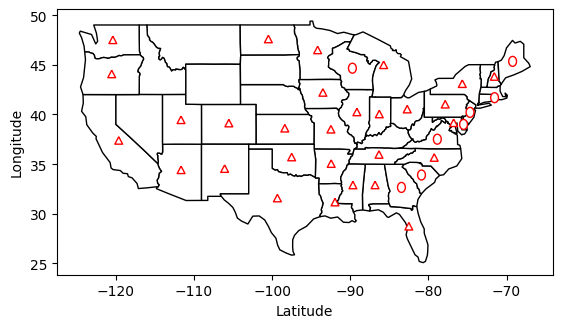

In [ ]:
fig, ax = plt.subplots()
new_usa_df.plot(ax=ax, facecolor='white', edgecolor='black')
small_gdf.plot(ax=ax, facecolor='white', edgecolor='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

## That's all folks!

Thank you for reaching the end of our tutorial! We hope you have learned how to:


*   Convert a CSV dataset into processed data
*   Create plots from this process data
*   Fully control how the plots look with axis mechanics, map projections, and additional shapes


